# PROJECT :: PREDICTING WHETHER OR NOT PATIENTS WILL DEVELOP STROKE CONDITION.

In [88]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
import torch
from torch import nn
import torch.nn.functional as F

In [89]:
# READ IN DATA
df = pd.read_csv("C:\\Datasets\\Stroke_Data\\healthcare-dataset-stroke-data.csv")

In [90]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [91]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [92]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [93]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [94]:
df.drop(['id'],axis=1,inplace=True)

In [95]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [96]:
df.shape

(5110, 11)

In [97]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [98]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [99]:
# I will create a function that returns the unique values and the most frequent  values
def unique_and_frequent(column,df=df):
    # The function takes in a column and returns total unique values
    print(f"The total number of unique value in {column} column is {df[column].nunique()}")
    print(f"The most frequent values in {column} is {df[column].value_counts().head(10)}")
    print("****************************************************************************")

In [100]:
# Applying our function to all the columns in the dataset
for column in df.columns :
    unique_and_frequent(column)

The total number of unique value in gender column is 3
The most frequent values in gender is Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
****************************************************************************
The total number of unique value in age column is 104
The most frequent values in age is 78.0    102
57.0     95
52.0     90
54.0     87
51.0     86
45.0     85
79.0     85
53.0     85
55.0     83
50.0     83
Name: age, dtype: int64
****************************************************************************
The total number of unique value in hypertension column is 2
The most frequent values in hypertension is 0    4612
1     498
Name: hypertension, dtype: int64
****************************************************************************
The total number of unique value in heart_disease column is 2
The most frequent values in heart_disease is 0    4834
1     276
Name: heart_disease, dtype: int64
****************************************************

# DATA ANALYSIS 

In [101]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# THE STROKE :: WHAT CAN WE SAY ABOUT IT?

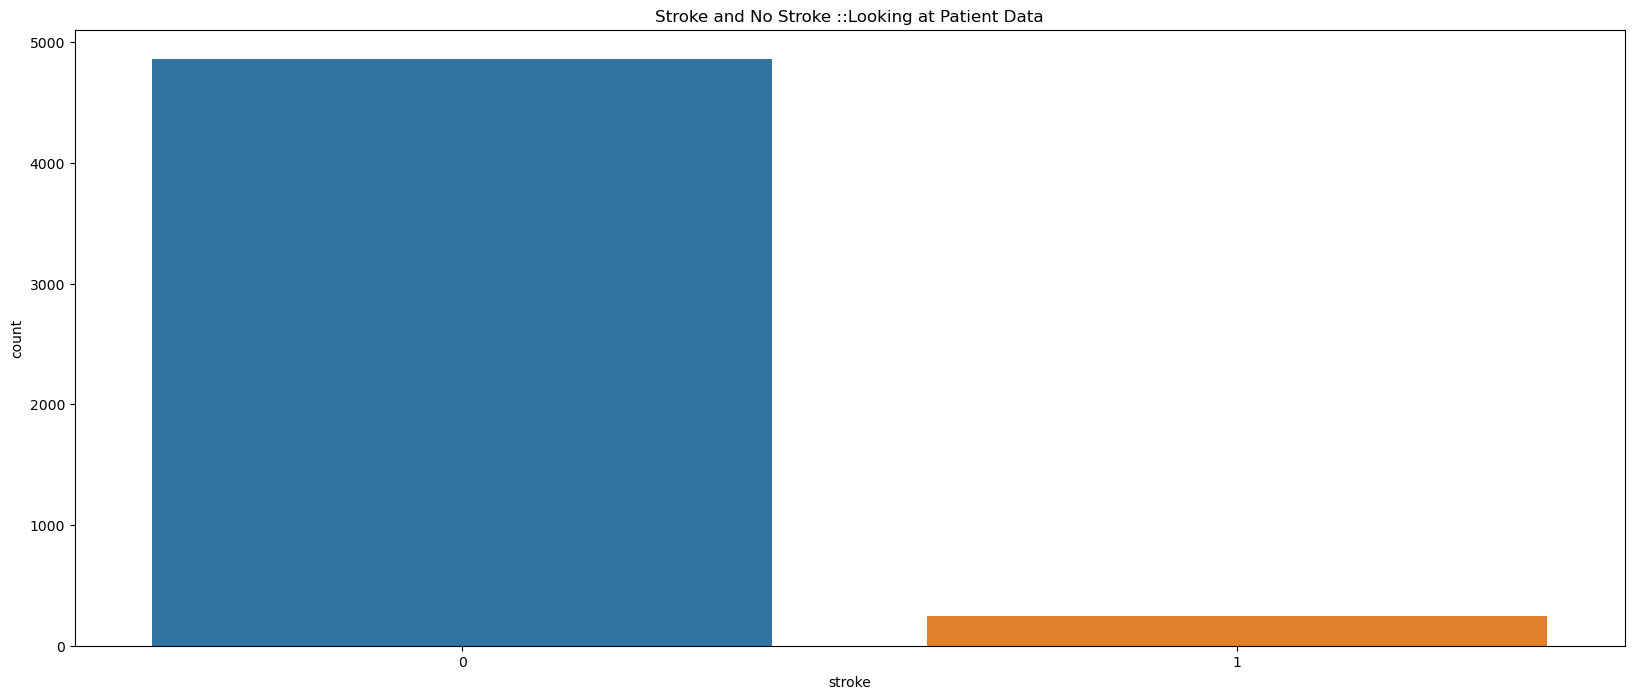

In [102]:
# Draw a countplot for all the cases of stroke
fig = plt.figure(figsize=(20,8))
sns.countplot(x ='stroke',data=df)
plt.title("Stroke and No Stroke ::Looking at Patient Data")
plt.show()

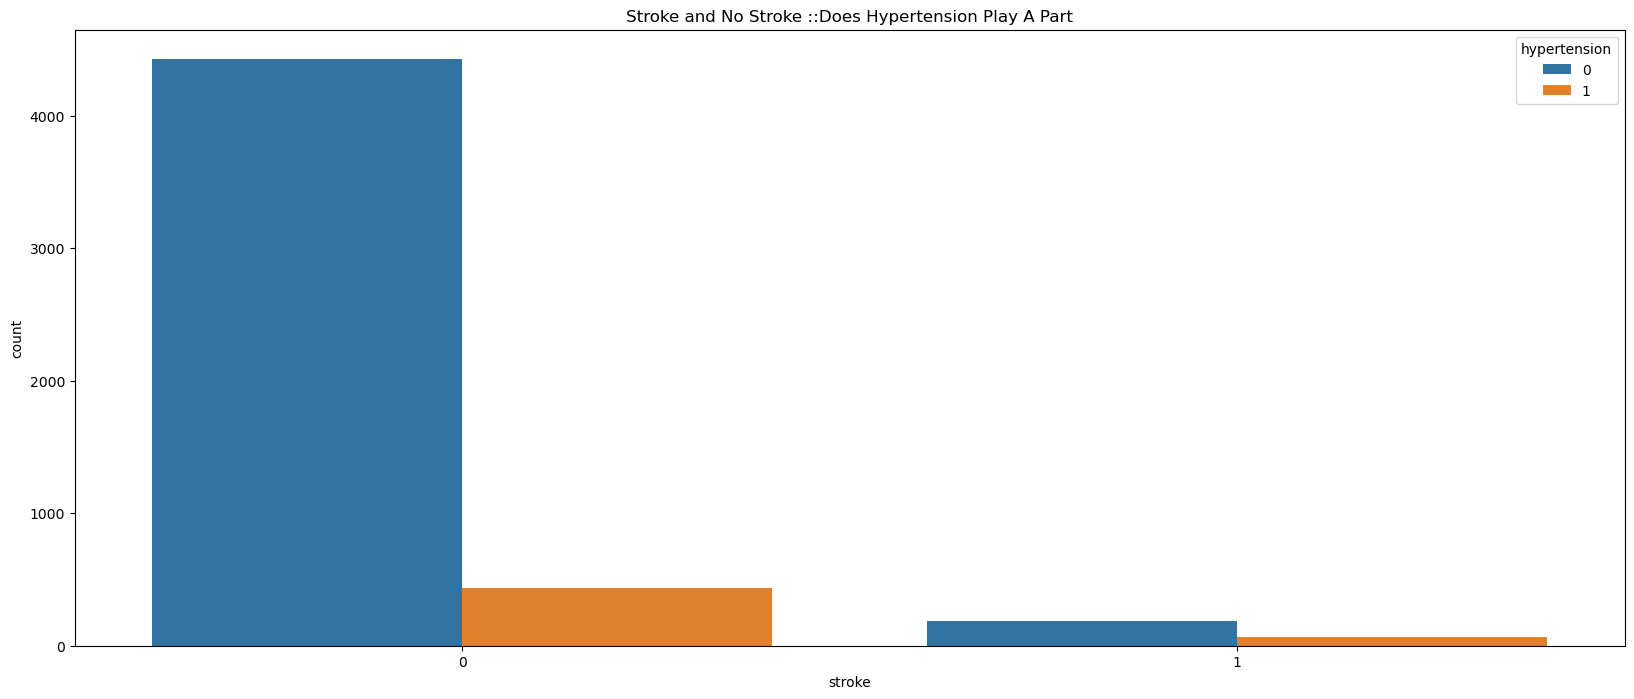

In [103]:
fig = plt.figure(figsize=(20,8))
sns.countplot(x ='stroke',data=df,hue='hypertension')
plt.title("Stroke and No Stroke ::Does Hypertension Play A Part") # Rather Inconclusive but we will look at that later
plt.show()

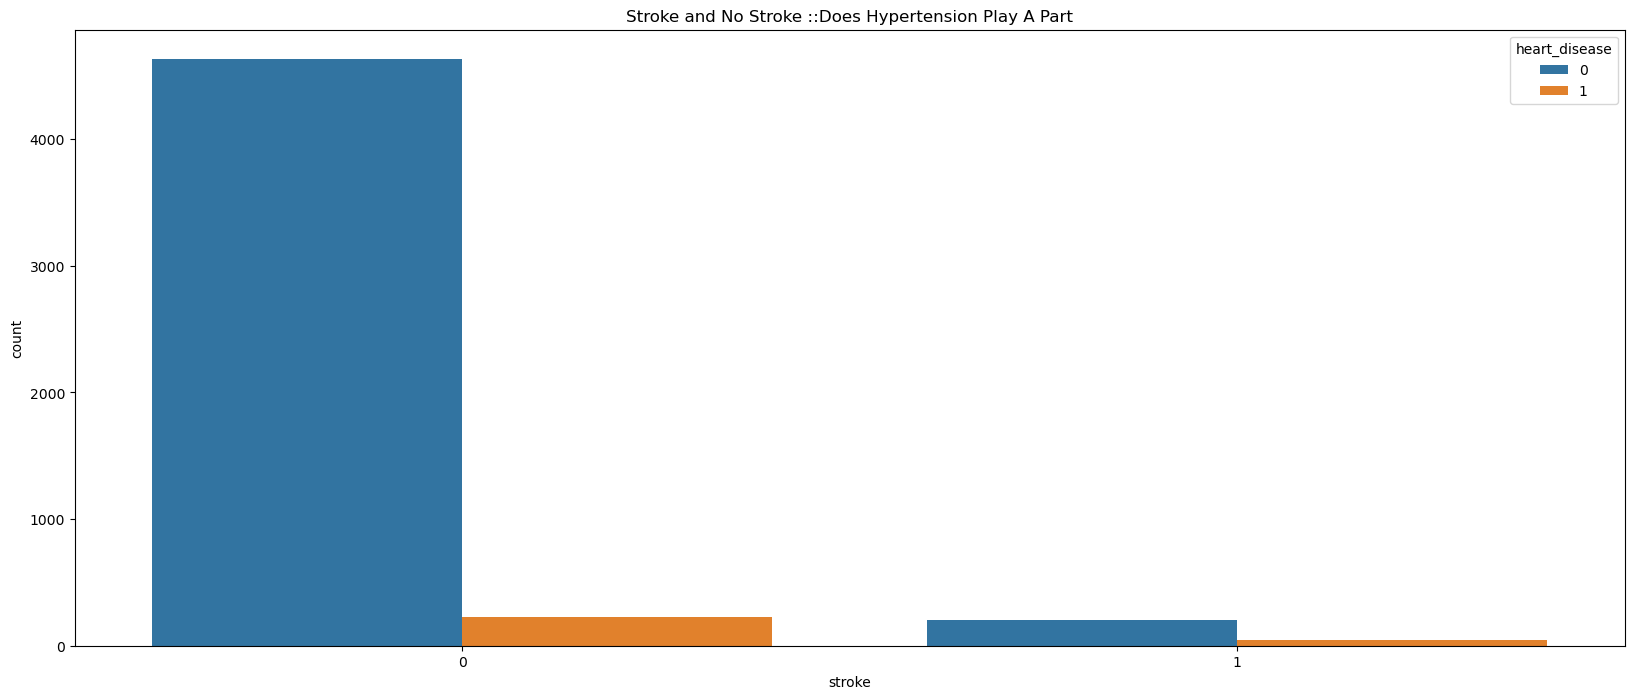

In [104]:
fig = plt.figure(figsize=(20,8))
sns.countplot(x ='stroke',data=df,hue='heart_disease')
plt.title("Stroke and No Stroke ::Does Hypertension Play A Part") # We can hardly tell,how about we draw a pairplot??
plt.show()

# A PAIRPLOT :: NEXT STEP IN UNDERSTANDING DATA

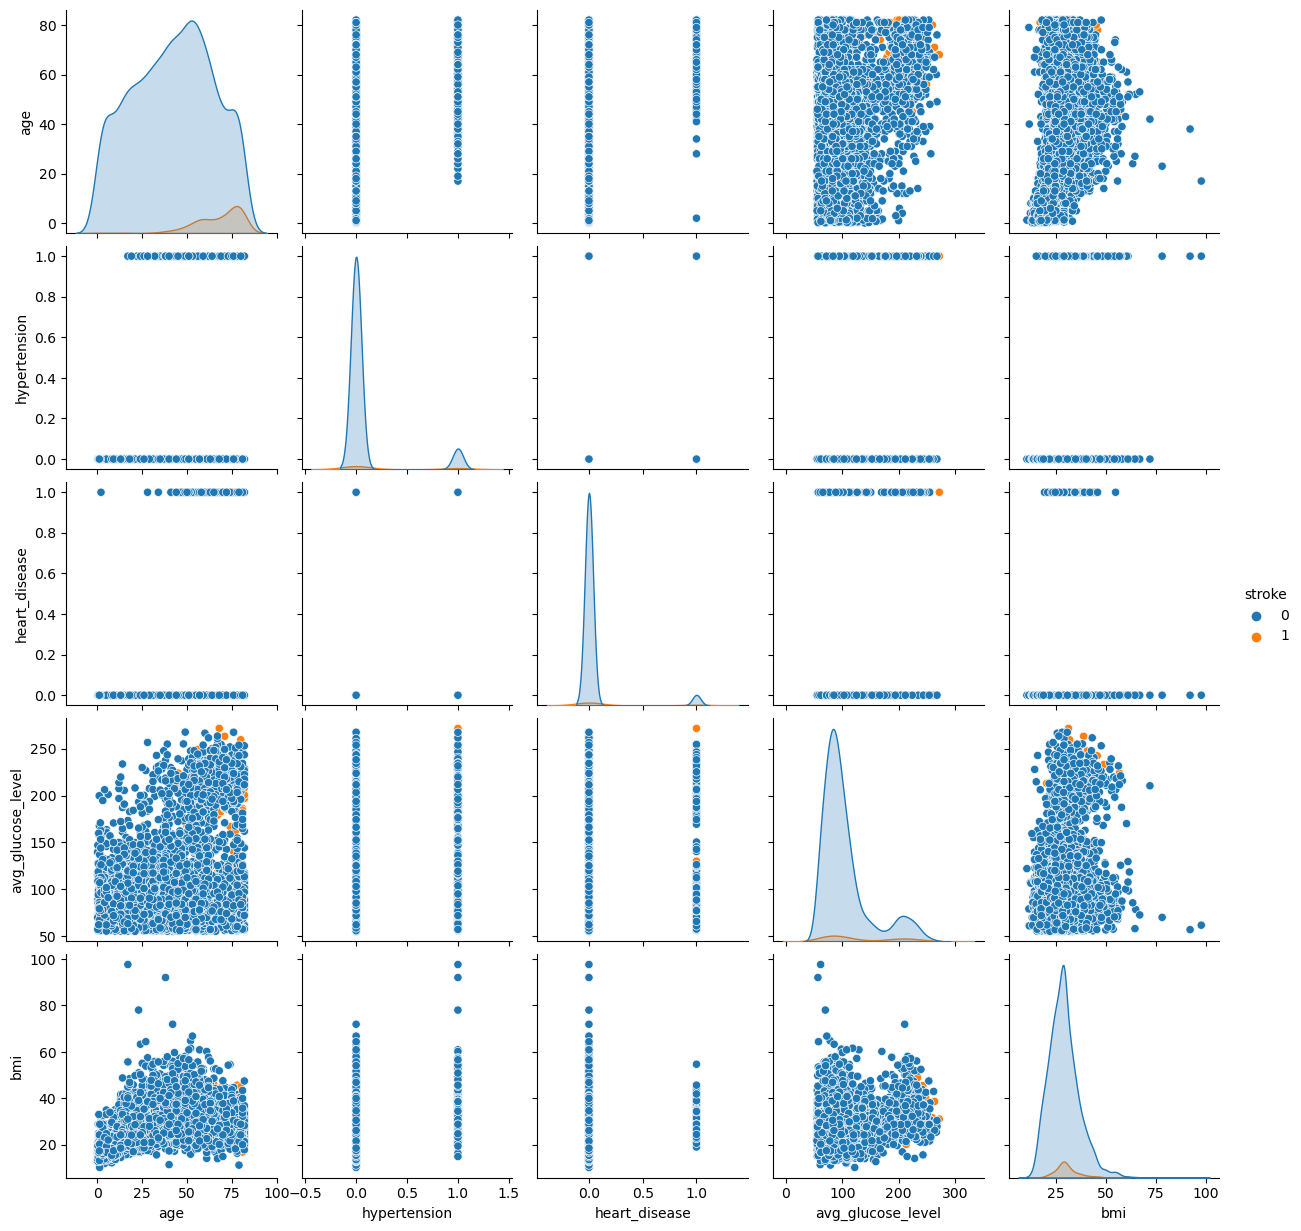

In [105]:
sns.pairplot(df,hue='stroke')
plt.show()

# UNIVARIATE ANALYSIS :: WHATS THAT WE CAN GRASP?>

<Figure size 2000x800 with 0 Axes>

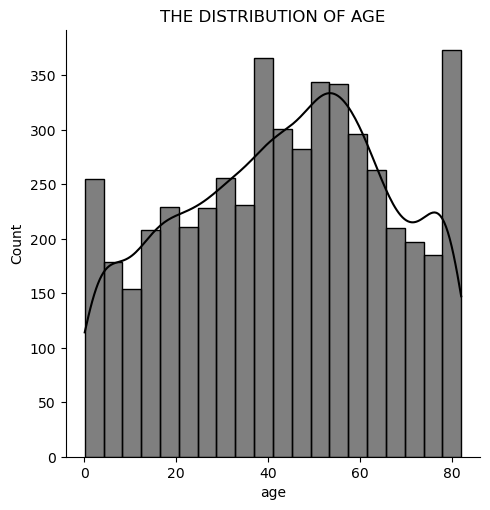

In [106]:
# DISTRIBUTION OF AGE 
fig=plt.figure(figsize=(20,8))
sns.displot(x='age',data=df,kde=True,color='black')
plt.title("THE DISTRIBUTION OF AGE")
plt.show()

<Figure size 2000x800 with 0 Axes>

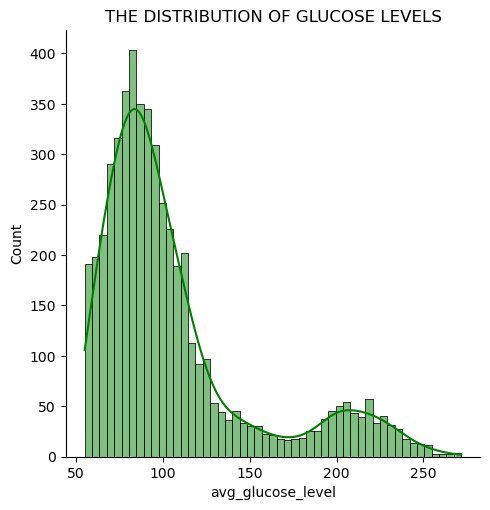

In [107]:
# GLUCOSE LEVELS ,WHATS THE COMMONALITY??
fig=plt.figure(figsize=(20,8))
sns.displot(x='avg_glucose_level',data=df,kde=True,color='green')
plt.title("THE DISTRIBUTION OF GLUCOSE LEVELS")
plt.show()

# Categorical Data  :: 

In [108]:
def category_plot(column,df=df,hue=None):
    """To avoid the repetition of code ,I saw it fit to create 
    a  function that does the exact same thing .It takes in column x
    and plots a countplot .It is specifically for categorical data """
    fig = plt.figure(figsize=(20,8))
    sns.countplot(x=column,data=df,hue=hue)
    plt.ylabel("Total Number")
    plt.title(f"Count Plot Showing The Distribution of {column}")

In [109]:
category_columns  = df.drop(['avg_glucose_level','age','bmi'],axis=1)
category_columns

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,never smoked,0
5106,Female,0,0,Yes,Self-employed,Urban,never smoked,0
5107,Female,0,0,Yes,Self-employed,Rural,never smoked,0
5108,Male,0,0,Yes,Private,Rural,formerly smoked,0


In [110]:
category_columns.columns

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')

# GENDER :: INDEPTH ANALYSIS

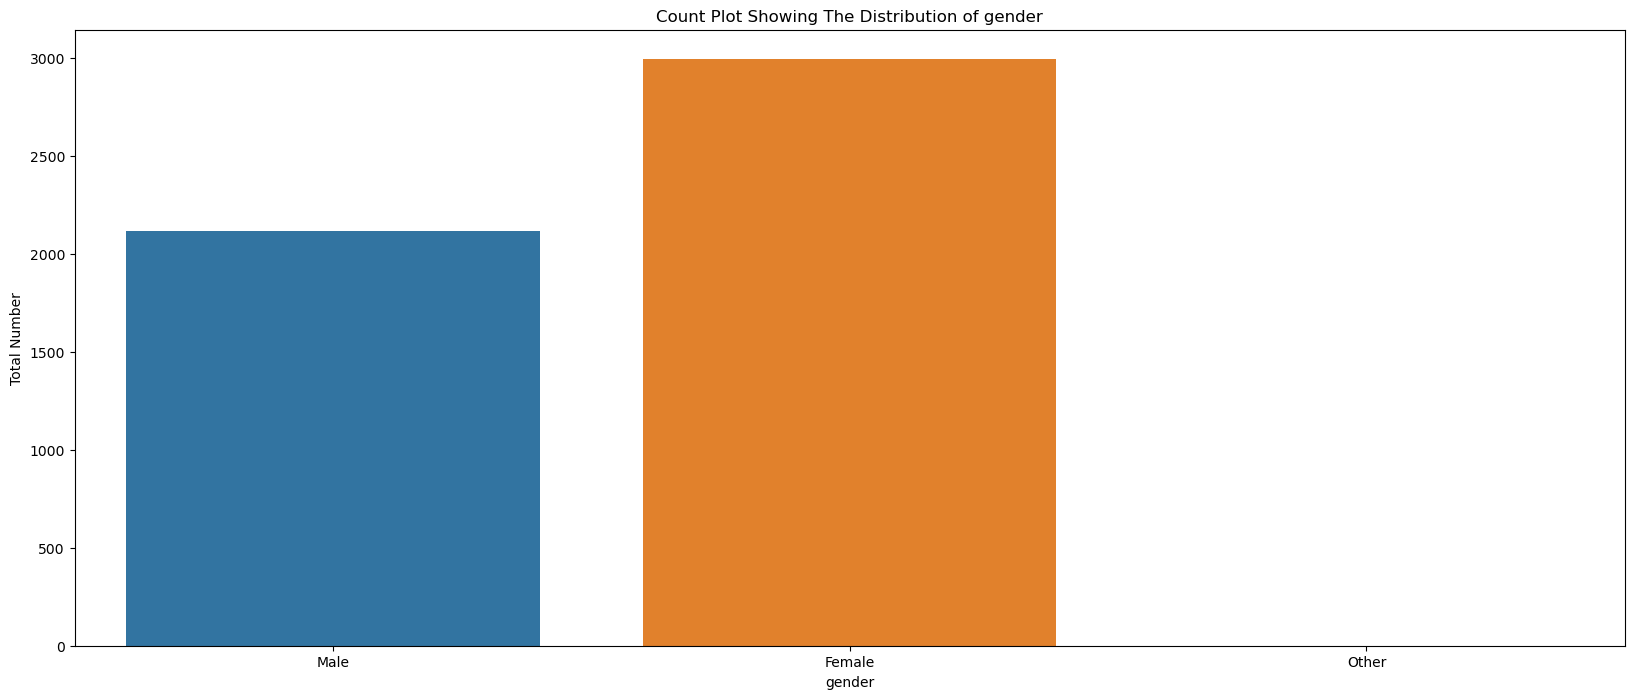

In [111]:
# GENDER WARS :: WHAT GENDER DOMINATES THE STUDY??
category_plot("gender") # There are more females in the study

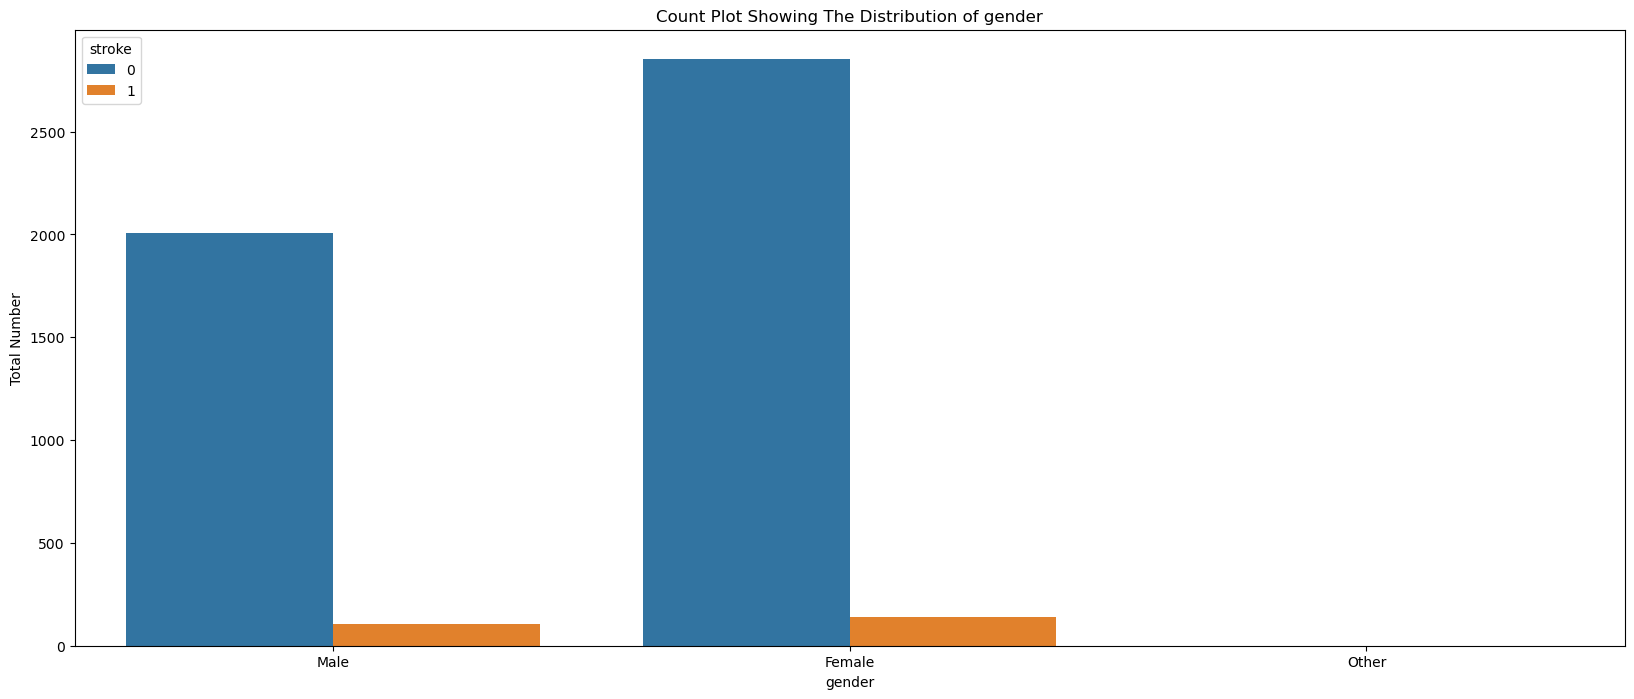

In [112]:
# GENDER ,WHO HAS HIGHER STROKE DIAGNOSIS
category_plot("gender",hue='stroke') # More females than males have the stroke condition

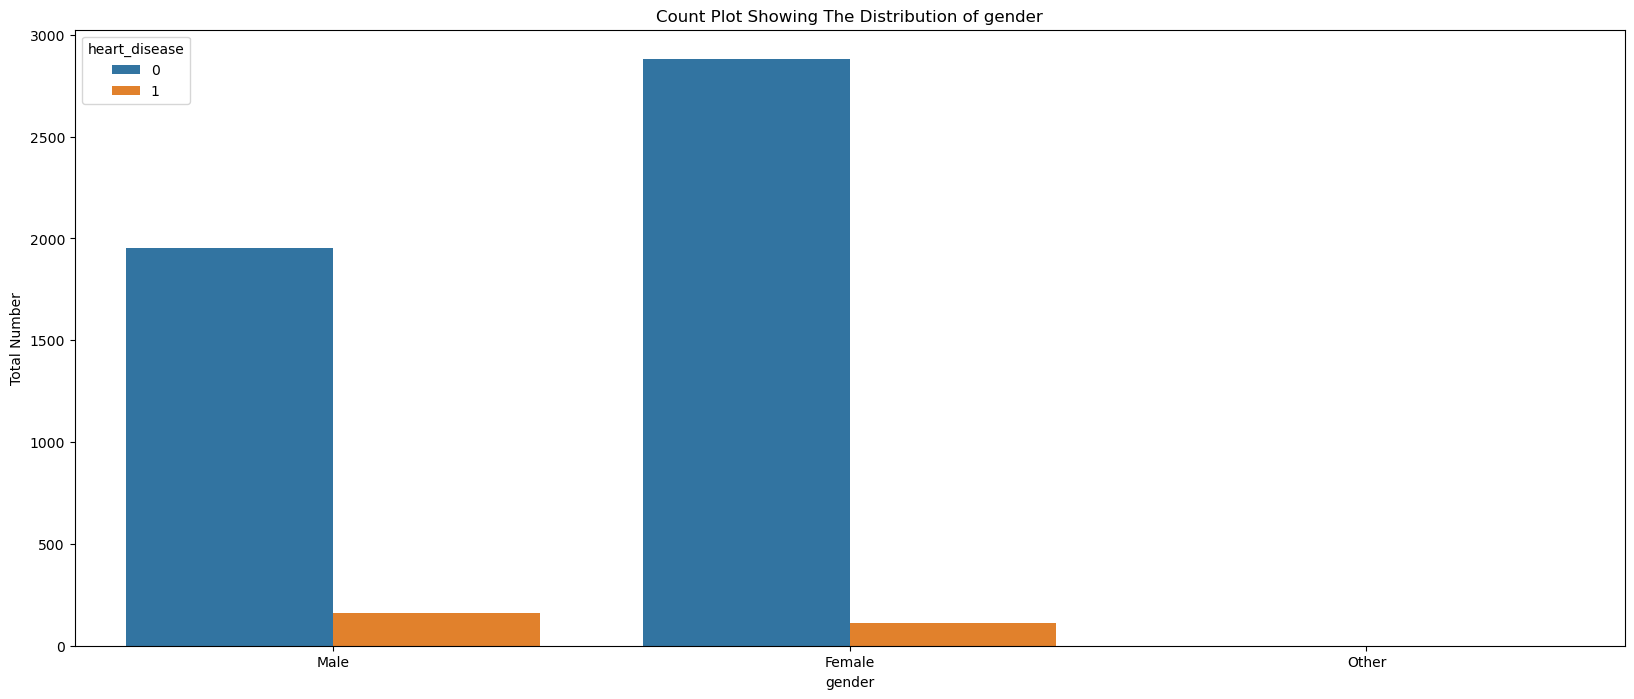

In [113]:
category_plot("gender",hue='heart_disease')  # More males have the heart condition as compared to females

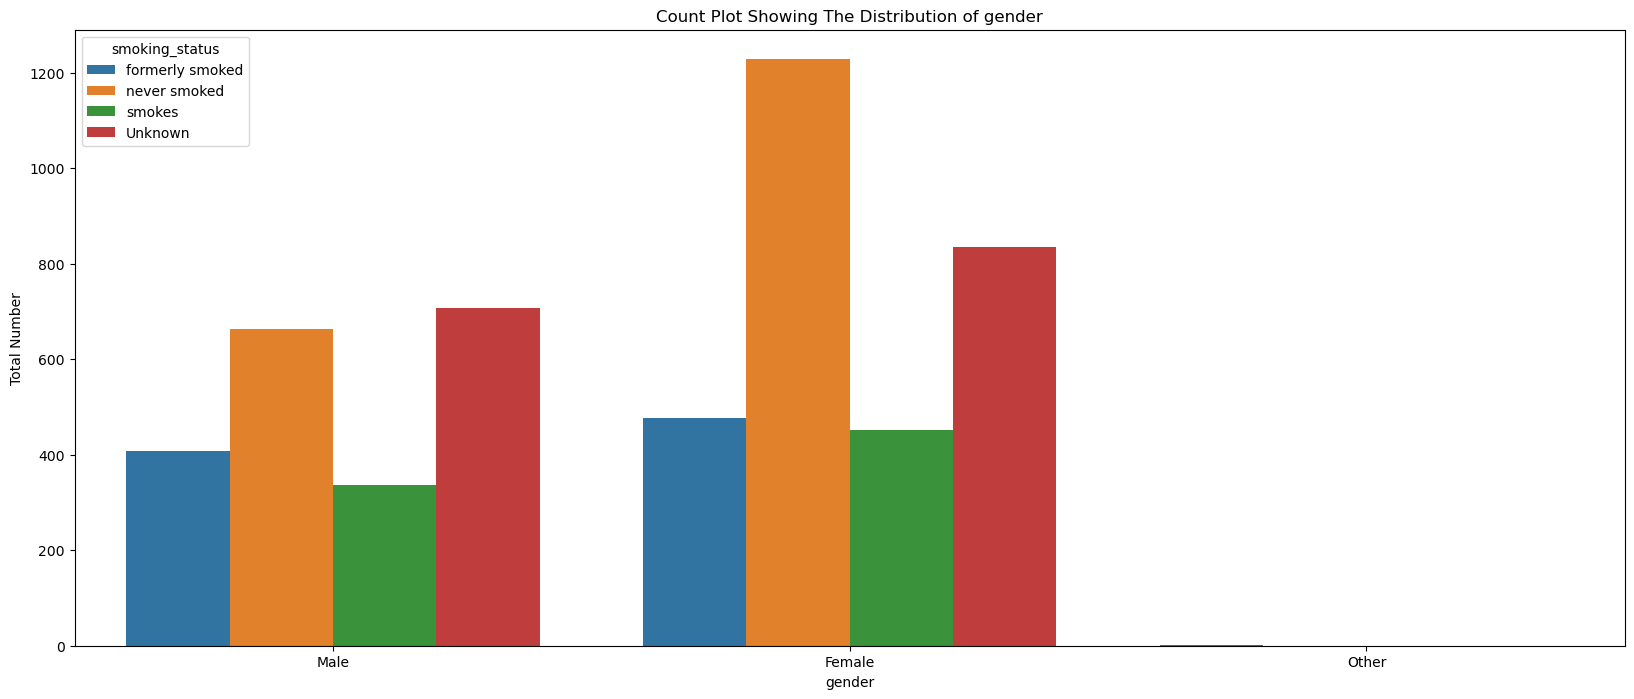

In [114]:
category_plot("gender",hue='smoking_status')  # Seemingly a lot of females smoke

# WORK AND RESIDENCY ARE THEY FACTORS REALLY??

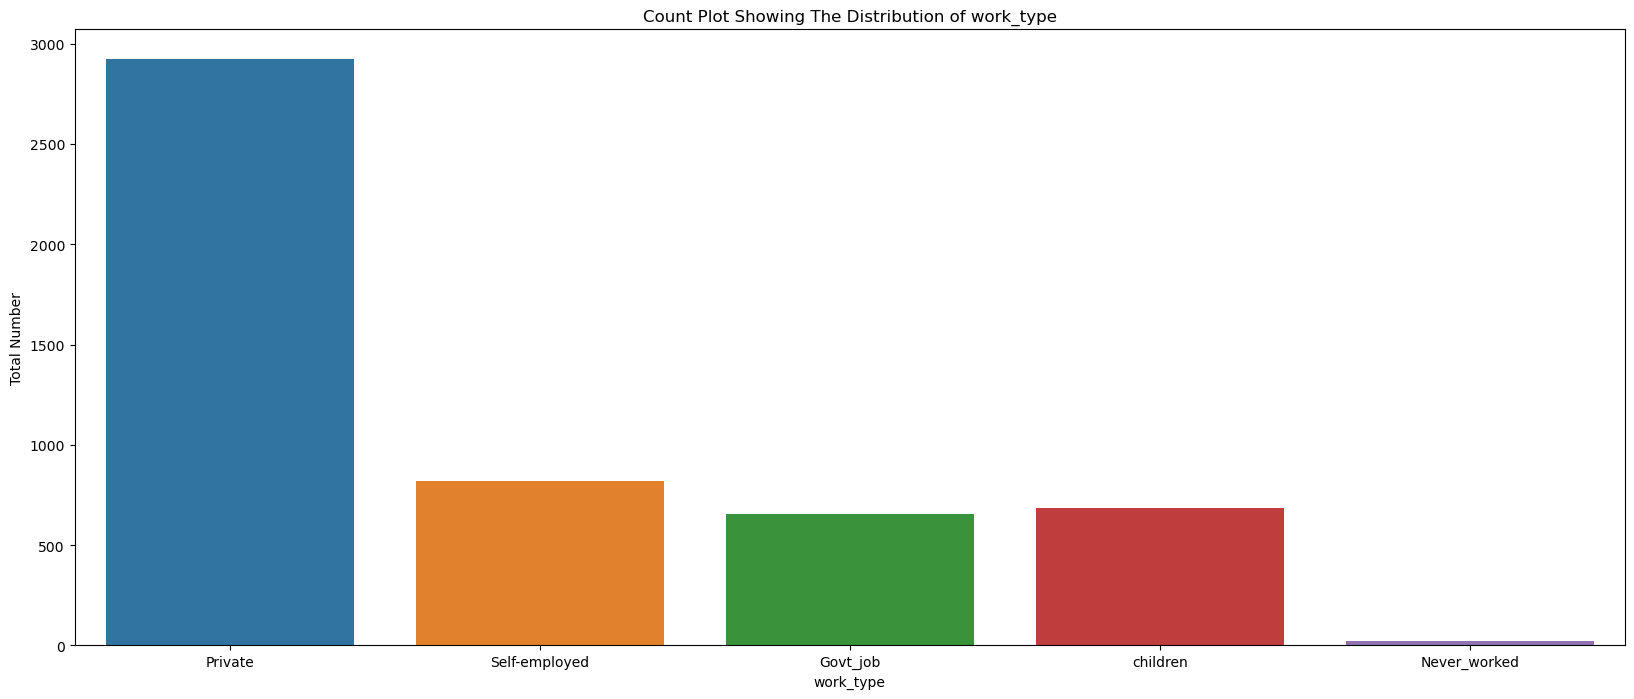

In [115]:
category_plot("work_type") # Majority of the participants in the study work in the private sector,and are self employed

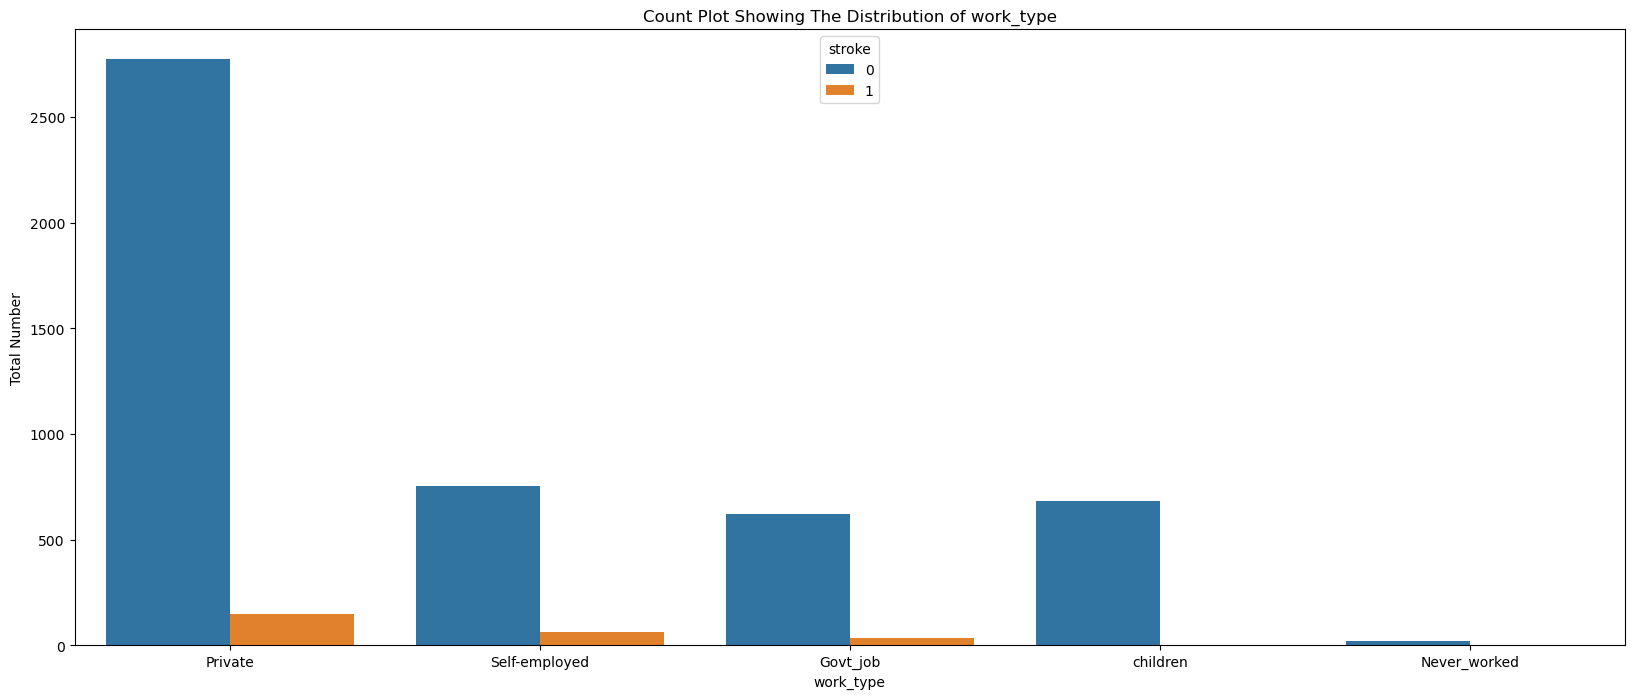

In [116]:
category_plot("work_type",hue='stroke')  # Most in the private sector developed stroke 

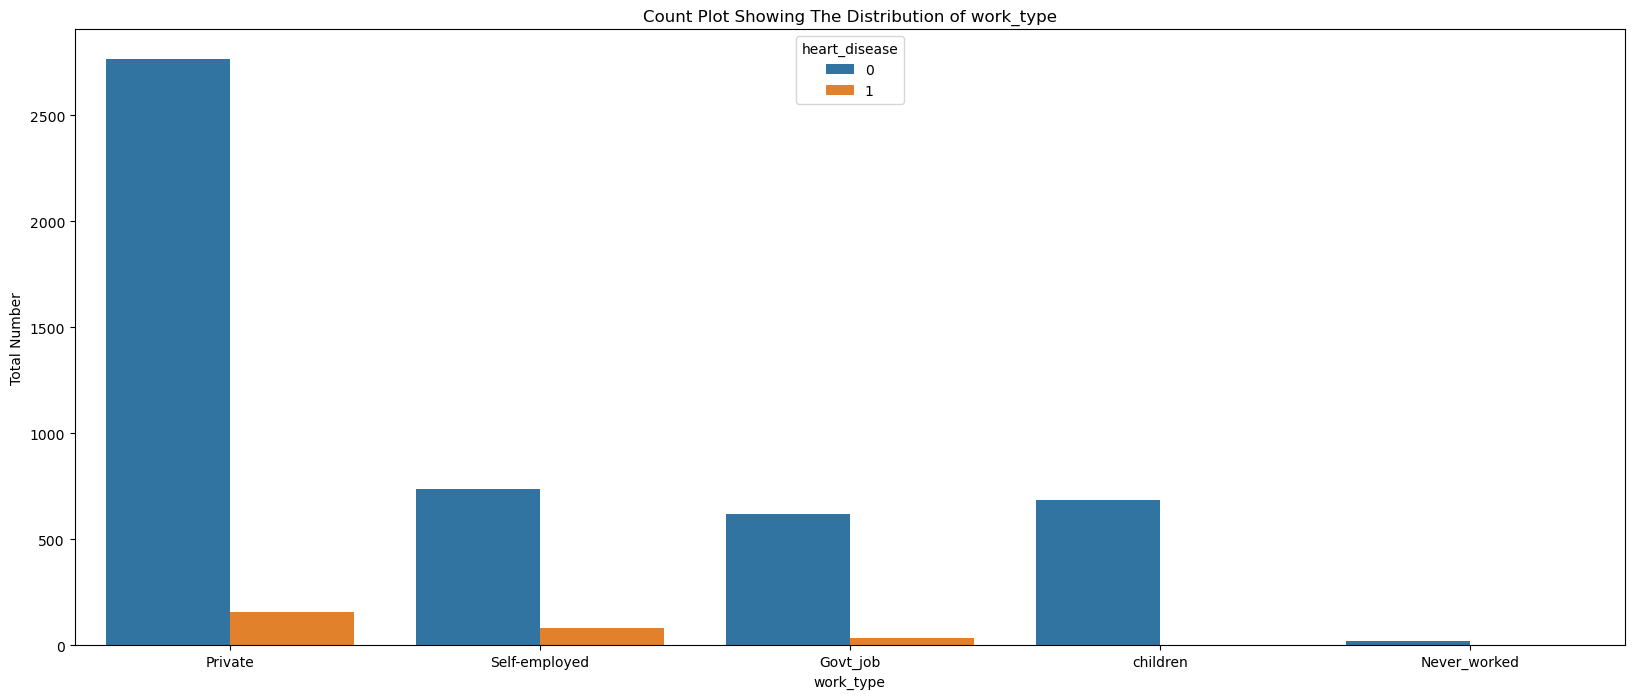

In [117]:
category_plot("work_type",hue='heart_disease') # The same goes for heart disease ,also inconclusive

# Residency

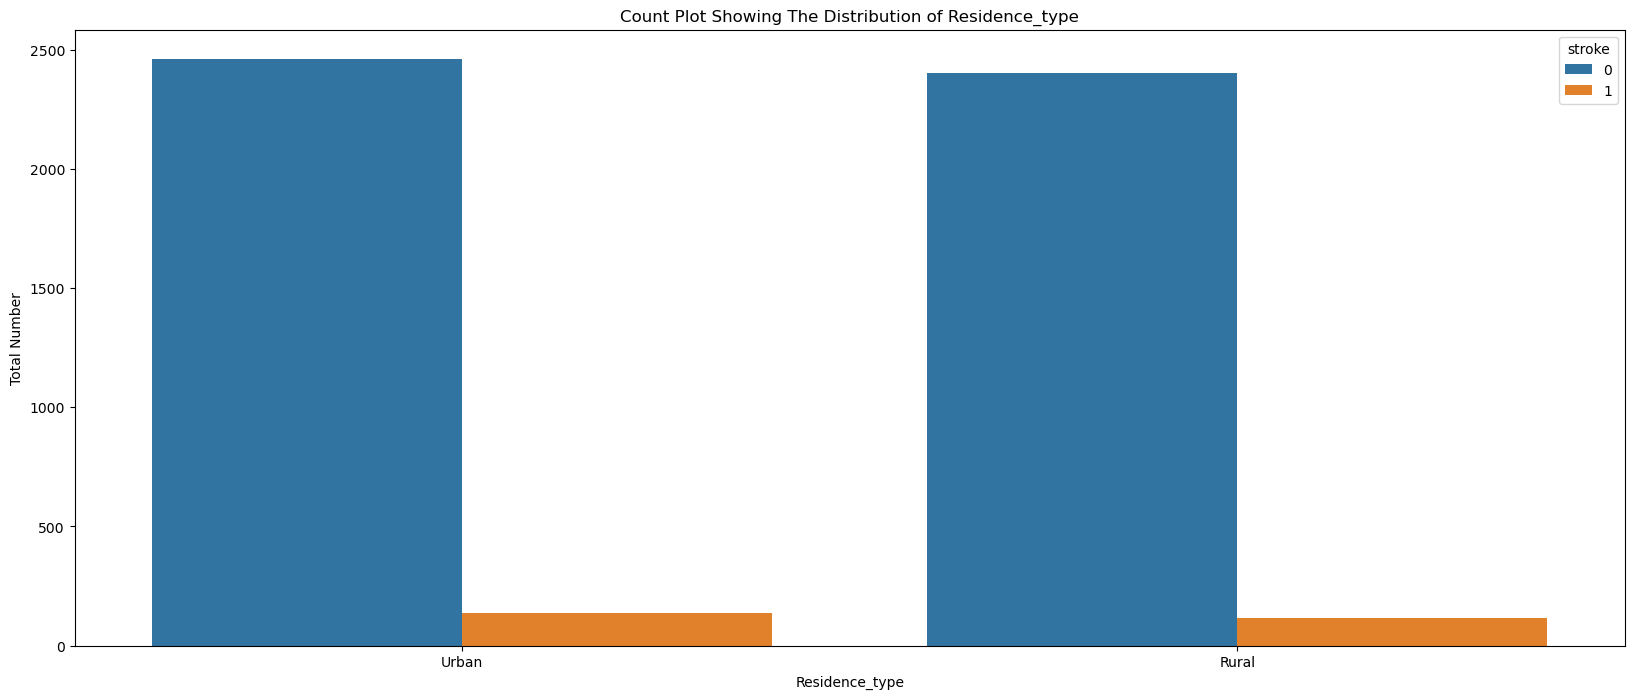

In [118]:
category_plot("Residence_type",hue='stroke') # There almost is a balance between both residency and stroke

# Marriage and Stroke?? Should it Matter??

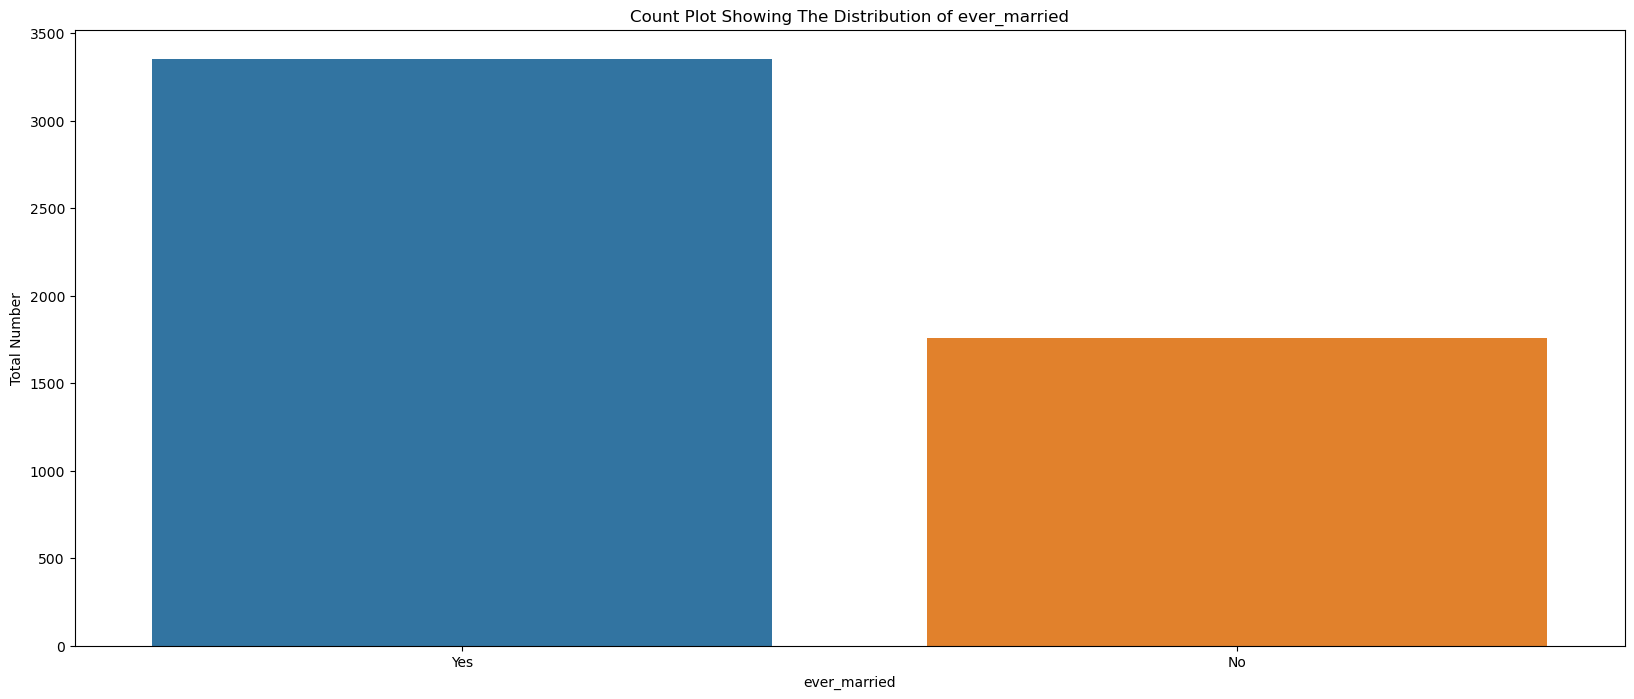

In [119]:
category_plot("ever_married")

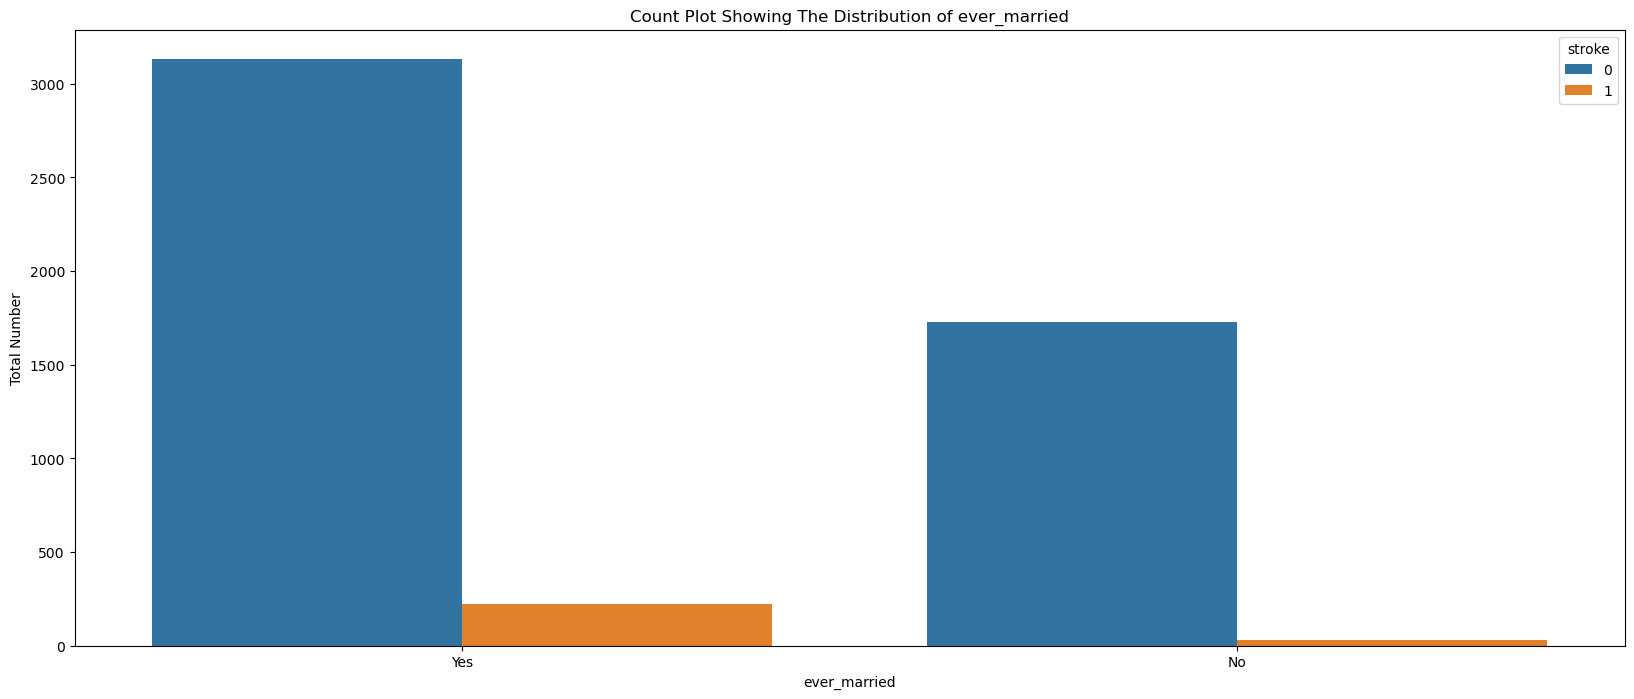

In [120]:
category_plot("ever_married",hue='stroke') # Can we conclude that Marriage leads to Stroke

# CORRELATION :: WHAT ARE THE PATTERNS THAT WE CAN CLEARLY MAP

In [121]:
correlation = df.corr()
correlation

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


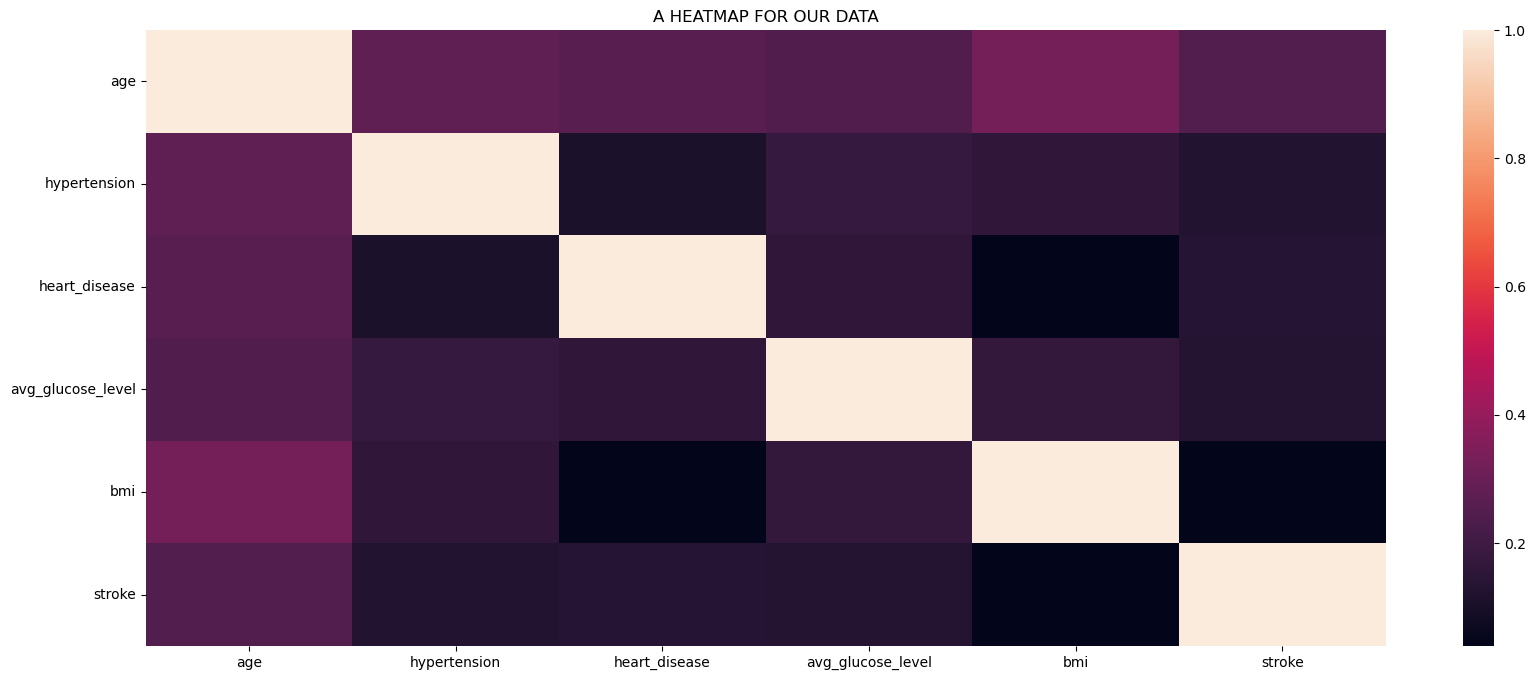

In [122]:
plt.figure(figsize=(20,8))
sns.heatmap(correlation)
plt.title("A HEATMAP FOR OUR DATA")
plt.show()

# LABEL ENCODING :: AND FINAL DATA PREPROCESSING

In [123]:
cat_features = category_columns.drop(['stroke','hypertension','heart_disease'],axis=1)

In [124]:
lbl_encoder = {}
for feature in cat_features.columns:
    lbl_encoder[feature] = LabelEncoder()
    df[feature] = lbl_encoder[feature].fit_transform(df[feature])

In [125]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [126]:
new_correlation = df.corr()
new_correlation

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.219148,1.000000,0.028123


In [138]:
X = df.drop(['stroke','work_type'],axis=1).values
y = df['stroke'].values.reshape(-1,1)

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [140]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [141]:
X_train.shape,y_train.shape

((4088, 9), (4088, 1))

# MACHINE LEARNING

In [142]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rf_predictions = rfc.predict(X_test)
print(f"The classification Report:{classification_report(y_test,rf_predictions)}")

C:\Users\EDGAR MUYALE DAVIES\AppData\Local\Temp\ipykernel_1352\3941156253.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


The classification Report:              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

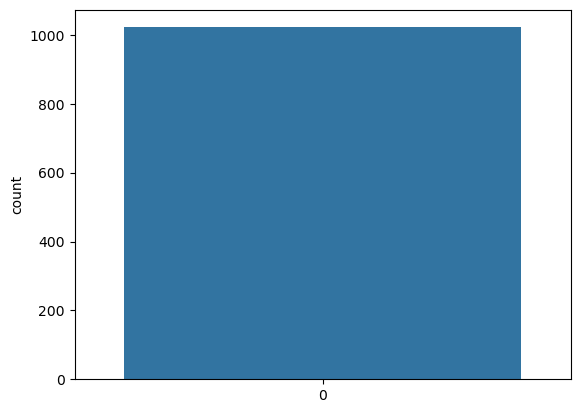

In [143]:
sns.countplot(rf_predictions)

In [144]:
svc = SVC()
svc.fit(X_train,y_train)
svc_predictions = svc.predict(X_test)
print(f"The classification Report:{classification_report(y_test,svc_predictions)}")

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The classification Report:              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [145]:
l_svc = LinearSVC()
l_svc.fit(X_train,y_train)
l_svc_predictions = l_svc.predict(X_test)
print(f"The classification Report:{classification_report(y_test,l_svc_predictions)}")

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The classification Report:              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning

# DEEP LEARNING

In [146]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [199]:
class StrokePredictor(nn.Module):
    def __init__(self,input_dim=9,hidden_dim=36,output_dim=1,p=0.2):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.linear1 = nn.Linear(input_dim,hidden_dim)
        self.linear2 = nn.Linear(hidden_dim,hidden_dim)
        self.fc = nn.Linear(hidden_dim,output_dim)
        self.dropout = nn.Dropout(p)
    def forward(self,x):
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.fc(x)
        x = F.relu(x)
        return x

In [200]:
model = StrokePredictor()

In [201]:
criterion  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

# TRAINING AND TESTING LOOP

In [202]:
epochs = 100
for epoch in range(epochs):
    model.train()
    y_pred = model.forward(X_train)
    loss = criterion(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        model.eval()
        y_pred = model.forward(X_test)
        test_loss = criterion(y_pred,y_test)
        if epoch % 5 ==0 :
            print(f"Epoch :{epoch}|Training Loss{loss}|test_loss{test_loss}")
            

Epoch :0|Training Loss0.04620910435914993|test_loss0.05985672399401665
Epoch :5|Training Loss0.04571828618645668|test_loss0.0596865676343441
Epoch :10|Training Loss0.04489932954311371|test_loss0.0595882348716259
Epoch :15|Training Loss0.044867143034935|test_loss0.059526603668928146
Epoch :20|Training Loss0.044582899659872055|test_loss0.059486329555511475
Epoch :25|Training Loss0.04528507590293884|test_loss0.05947428196668625
Epoch :30|Training Loss0.04466991126537323|test_loss0.059447742998600006
Epoch :35|Training Loss0.04478176683187485|test_loss0.05941629037261009
Epoch :40|Training Loss0.04402155429124832|test_loss0.059392523020505905
Epoch :45|Training Loss0.04448162019252777|test_loss0.059361059218645096
Epoch :50|Training Loss0.044078487902879715|test_loss0.05934791639447212
Epoch :55|Training Loss0.044609084725379944|test_loss0.05933422967791557
Epoch :60|Training Loss0.04413824900984764|test_loss0.05931505560874939
Epoch :65|Training Loss0.04438943788409233|test_loss0.05930387

In [212]:
prediction = model.forward(X_test).detach().numpy()

In [213]:
prediction

array([[0.        ],
       [0.        ],
       [0.04025972],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [214]:
prediction = scaler.inverse_transform(X_train)

In [215]:
prediction.shape

(4088, 9)